In [1]:
# Importing dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets
import seaborn as sns



In [2]:
airline_data = pd.read_csv("Data.csv")
airline_data.head()

,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,airline_name,Description,Code.y
0,2018,1,1/9/18 00:00,AS,498,14057,12892,-13.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
1,2018,1,1/9/18 00:00,AS,502,14057,12892,-12.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
2,2018,1,1/9/18 00:00,AS,532,14057,14679,-5.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
3,2018,1,1/9/18 00:00,AS,540,14057,12892,-11.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
4,2018,1,1/9/18 00:00,AS,544,14057,12892,-6.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX


In [3]:
# Determining the shape of dataset
print(airline_data.dtypes)
airline_data.shape

YEAR                     int64
MONTH                    int64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
DEST_AIRPORT_ID          int64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED                int64
CANCELLATION_CODE       object
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
airline_name            object
Description             object
Code.y                  object
dtype: object


(2359976, 26)

In [4]:
null_counts = airline_data.isnull().sum()
print(null_counts)


YEAR                         0
MONTH                        0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_DELAY                45474
DEP_DELAY_NEW            45474
DEP_DEL15                45474
DEP_DELAY_GROUP          45474
ARR_DELAY                51526
ARR_DELAY_NEW            51526
ARR_DEL15                51526
ARR_DELAY_GROUP          51526
CANCELLED                    0
CANCELLATION_CODE      2313116
DIVERTED                     0
CARRIER_DELAY          1916035
WEATHER_DELAY          1916035
NAS_DELAY              1916035
SECURITY_DELAY         1916035
LATE_AIRCRAFT_DELAY    1916035
airline_name                 0
Description                  0
Code.y                       0
dtype: int64


In [5]:
max_cancelled = airline_data['CANCELLED'].max()
min_cancelled = airline_data['CANCELLED'].min()
max_diverted = airline_data['DIVERTED'].max()
min_diverted = airline_data['DIVERTED'].min()

print("Max CANCELLED:", max_cancelled)
print("Min CANCELLED:", min_cancelled)
print("Max DIVERTED:", max_diverted)
print("Min DIVERTED:", min_diverted)

Max CANCELLED: 1
Min CANCELLED: 0
Max DIVERTED: 1
Min DIVERTED: 0


In [6]:
cancelled_count = airline_data['CANCELLED'].value_counts().get(1, 0)

diverted_count = airline_data['DIVERTED'].value_counts().get(1, 0)

print("Number of rows = 1:", cancelled_count)
print("Number of rows = 1:", diverted_count)

Number of rows = 1: 46860
Number of rows = 1: 4667


In [7]:
# Creating subset
SUBSET_COLS = ["ORIGIN_AIRPORT_ID", "Description", "Code.y",  "OP_UNIQUE_CARRIER",
               "airline_name", "YEAR", "MONTH", "FL_DATE", "OP_CARRIER_FL_NUM",
               "DEST_AIRPORT_ID", "DEP_DELAY","ARR_DELAY", "CANCELLED", "DIVERTED"]
subset_data = airline_data.loc[:, SUBSET_COLS].dropna()
null_counts = subset_data.isnull().sum()
print(null_counts)
print(subset_data.shape)

ORIGIN_AIRPORT_ID    0
Description          0
Code.y               0
OP_UNIQUE_CARRIER    0
airline_name         0
YEAR                 0
MONTH                0
FL_DATE              0
OP_CARRIER_FL_NUM    0
DEST_AIRPORT_ID      0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
DIVERTED             0
dtype: int64
(2308450, 14)


In [8]:
# Checking min/max values in all columns
airline_data.describe()
# Checking min/max values in all columns
airline_data.describe()


,YEAR,MONTH,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.359976e+06,2.314502e+06,2.314502e+06,2.314502e+06,2.314502e+06,2.308450e+06,2.308450e+06,2.308450e+06,2.308450e+06,2.359976e+06,2.359976e+06,443941.000000,443941.000000,443941.000000,443941.000000,443941.000000
mean,2.019748e+03,6.296430e+00,8.777711e+02,1.297191e+04,1.300940e+04,8.125578e+00,1.248565e+01,1.790994e-01,-3.617495e-02,3.515730e+00,1.290445e+01,1.923117e-01,-2.508163e-01,1.985613e-02,1.977562e-03,17.292633,1.910896,20.538524,0.262431,21.697437
std,1.363459e+00,3.410495e+00,6.871444e+02,1.543660e+03,1.532922e+03,4.198176e+01,4.038674e+01,3.834356e-01,2.167581e+00,4.429626e+01,4.012295e+01,3.941167e-01,2.309937e+00,1.395058e-01,4.442581e-02,48.445608,17.868101,40.467277,4.113304,51.083581
min,2.018000e+03,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,-1.140000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,-1.060000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.019000e+03,3.000000e+00,3.780000e+02,1.143300e+04,1.161800e+04,-7.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.600000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.020000e+03,6.000000e+00,7.290000e+02,1.319800e+04,1.320400e+04,-3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,0.000000,0.000000
75%,2.021000e+03,9.000000e+00,1.185000e+03,1.463500e+04,1.467900e+04,6.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,17.000000,0.000000,25.000000,0.000000,23.000000
max,2.022000e+03,1.200000e+01,7.951000e+03,1.599100e+04,1.599100e+04,1.527000e+03,1.527000e+03,1.000000e+00,1.200000e+01,1.527000e+03,1.527000e+03,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1512.000000,1236.000000,1515.000000,428.000000,1520.000000


In [9]:
# Calculating total arrival and departure delay to figure out on-time performance
airline_data["ARR_DELAY"].abs() + airline_data["DEP_DELAY"].abs()

0           59.0
1           14.0
2           13.0
3           34.0
4           18.0
           ...  
2359971    338.0
2359972    239.0
2359973     74.0
2359974     80.0
2359975      NaN
Length: 2359976, dtype: float64

In [10]:
# Defining Max to calculate max value in Arrival Delay
def actual_delay(raw_delay):
    corrected_delay = max(0, raw_delay)
    return corrected_delay

In [11]:
# Calculating total arrival and departure delay to figure out on-time performance
subset_data["ARR_DELAY"].map(actual_delay)

0            0.0
1            0.0
2            0.0
3            0.0
4           12.0
           ...  
2359970     16.0
2359971    165.0
2359972    119.0
2359973     33.0
2359974     44.0
Name: ARR_DELAY, Length: 2308450, dtype: float64

In [12]:
# Creating a new column for total delay
subset_data["ADJ_DELAY"]= subset_data["ARR_DELAY"].map(actual_delay)
subset_data.to_csv("Updated_Data.csv", index=False)

In [13]:
# Creating a subset of delay times
subset_data[["ADJ_DELAY", "ARR_DELAY", "DEP_DELAY"]]

,ADJ_DELAY,ARR_DELAY,DEP_DELAY
0,0.0,-46.0,-13.0
1,0.0,-2.0,-12.0
2,0.0,-8.0,-5.0
3,0.0,-23.0,-11.0
4,12.0,12.0,-6.0
...,...,...,...
2359970,16.0,16.0,-2.0
2359971,165.0,165.0,173.0
2359972,119.0,119.0,120.0
2359973,33.0,33.0,41.0


In [14]:
# Calculate the on-time performance for each airline
total_flights = subset_data.shape[0]
on_time_flights = subset_data[(subset_data["ADJ_DELAY"] <= 0)].shape[0]
on_time_performance = (on_time_flights/ total_flights) * 100

In [15]:
# Calculating # of on-time flights for each airline
on_time_flights = len(subset_data[subset_data["ADJ_DELAY"] == 0])
print(f"Number of on-time flights: {on_time_flights}")
on_time_flights = subset_data[subset_data["ADJ_DELAY"] == 0].groupby("airline_name").size()
print(on_time_flights)

Number of on-time flights: 1494196
airline_name
Alaska      618994
Frontier    340804
Spirit      534398
dtype: int64


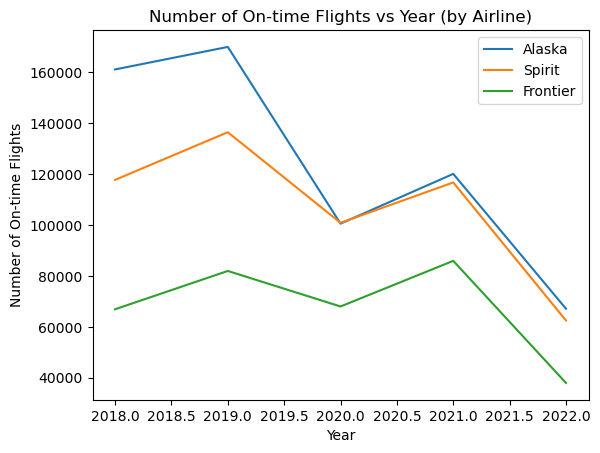

In [16]:
# Group data by year and airline, and count the number of on-time flights
on_time_counts = subset_data[subset_data["ADJ_DELAY"] == 0].groupby(["YEAR", "airline_name"]).size()
# Get unique airlines in the dataset
airlines = subset_data["airline_name"].unique()
# Plot the lines for each airline
for airline in airlines:
    # Select data for the current airline
    airline_counts = on_time_counts.loc[:, airline]
    # Plot the line for the current airline
    plt.plot(airline_counts.index.get_level_values("YEAR"), airline_counts.values, label=airline)
plt.xlabel("Year")
plt.ylabel("Number of On-time Flights")
plt.title("Number of On-time Flights vs Year (by Airline)")
plt.legend()
plt.show()

rvalue: -0.45594067421361223


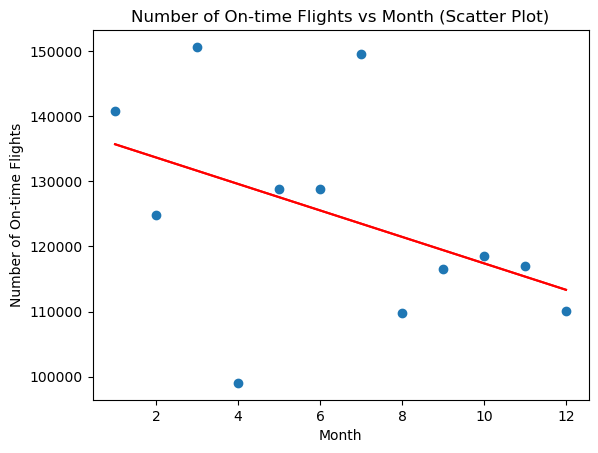

In [17]:
# Filter on-time flights (TOTAL_DELAY = 0)
on_time_flights = subset_data[subset_data["ADJ_DELAY"] == 0]
# Count the number of on-time flights per month
monthly_counts = on_time_flights.groupby("MONTH").size()
# Calculate the regression line coefficients
x = monthly_counts.index
y = monthly_counts.values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("rvalue:", rvalue)
# Create scatter plot
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2000,10000),fontsize=15,color="red")
plt.xlabel("Month")
plt.ylabel("Number of On-time Flights")
plt.title("Number of On-time Flights vs Month (Scatter Plot)")
plt.plot(x,regress_values,"r-")
plt.show()

Airlines with the highest on-time performance:
airline_name
Spirit      66.173828
Alaska      65.268563
Frontier    61.683647
dtype: float64


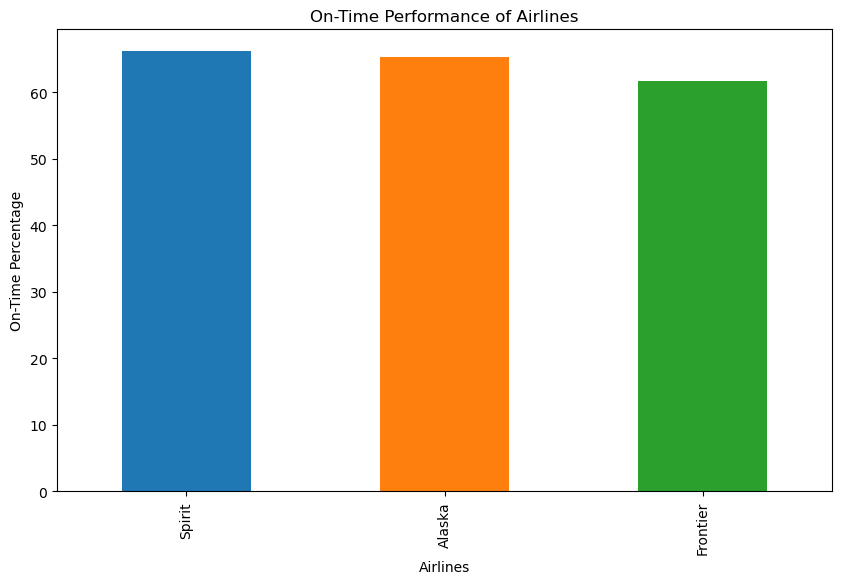

In [18]:
# Calculate the total number of flights for each airline
total_flights = subset_data.groupby('airline_name').size()
# Calculate the number of on-time flights for each airline
on_time_flights = subset_data[subset_data['ADJ_DELAY'] == 0].groupby('airline_name').size()
# Calculate the percentage of on-time flights for each airline
on_time_percentage = (on_time_flights / total_flights) * 100
# Sort the airlines based on the on-time percentage in descending order
sorted_airlines = on_time_percentage.sort_values(ascending=False)
# Print the airlines with the highest on-time performance
print("Airlines with the highest on-time performance:")
print(sorted_airlines.head())
# Generate a list of colors for each airline
colors = plt.cm.tab10(np.arange(len(sorted_airlines)))
# Visualize the on-time performance using a bar plot with different colors
plt.figure(figsize=(10, 6))
sorted_airlines.plot(kind='bar', color=colors)
plt.xlabel('Airlines')
plt.ylabel('On-Time Percentage')
plt.title('On-Time Performance of Airlines')
plt.show()

# Question 3 - Would the travel delays be effected by the month of the year

In this analysis, we are checking if there is any corelation between flight delays and the time of the year. This analysis can help airlines and airports optimize scheduling and allocate resources more effectively.

## Creating the tables for each airline - Alaska, Frontier & Spirit

### Creating the clean table for Alaska Airlines

In [19]:
#Creating a rough table for analysis
alaska_rough = airline_data.loc[airline_data["airline_name"]=="Alaska",:]
alaska = alaska_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_alaska = alaska.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_alaska = alaska.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
alaska_df = pd.merge(dep_delay_alaska,arr_delay_alaska, on=["YEAR", "MONTH"], how="left")
alaska_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]
alaska_df

,Year,Month,Departure Delay,Arrival Delay
0,2018,1,-2.0,-7.0
1,2018,2,-1.0,-4.0
2,2018,3,-1.0,-4.0
3,2018,4,2.0,-0.0
4,2018,5,3.0,2.0
5,2018,6,3.0,-0.0
6,2018,7,3.0,0.0
7,2018,8,8.0,7.0
8,2018,9,0.0,-3.0
9,2018,10,3.0,1.0


### Creating the clean table for Frontier Airlines

In [20]:
#Creating a rough table for analysis
frontier_rough = airline_data.loc[airline_data["airline_name"]=="Frontier",:]
frontier = frontier_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_frontier = frontier.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_frontier = frontier.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
frontier_df = pd.merge(dep_delay_frontier,arr_delay_frontier, on=["YEAR", "MONTH"], how="left")
frontier_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]

### Creating the clean table for Spirit Airlines

In [21]:
#Creating a rough table for analysis
spirit_rough = airline_data.loc[airline_data["airline_name"]=="Spirit",:]
spirit = spirit_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_spirit = spirit.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_spirit = spirit.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
spirit_df = pd.merge(dep_delay_spirit,arr_delay_spirit, on=["YEAR", "MONTH"], how="left")
spirit_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]

## Plotting the graphs for Months vs Number of Delays for all the Airlines

### I. Alaska Airlines

#### - for Departure Delays

The mean r-value is 0.188


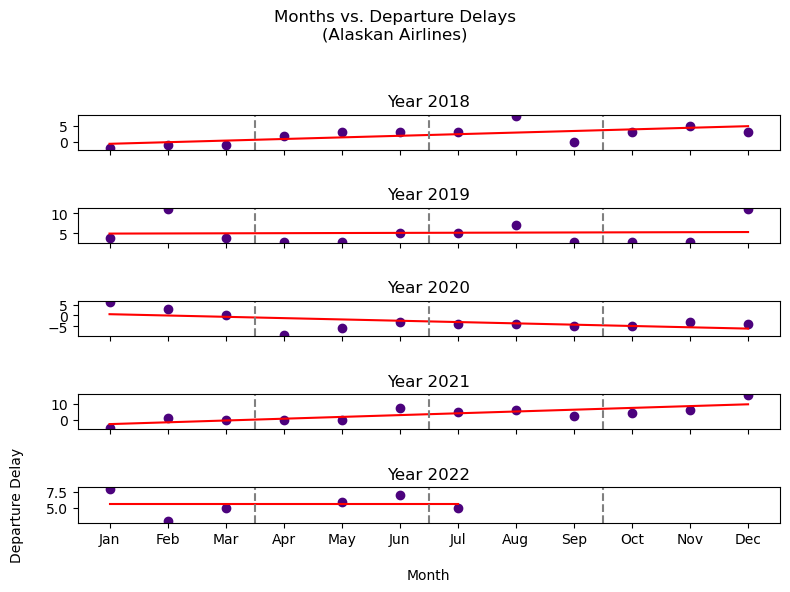

In [24]:
# Finding the unique years in the dataset
years = alaska_df["Year"].unique()

# Code to create the graph
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

#Creating an empty list to store the rvalues
r_values = []

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = alaska_df[alaska_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    r_values.append(rvalue)
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Printing the mean rvalue
mean_rvalue1 = round(np.mean(r_values),3)
print(f"The mean r-value is {mean_rvalue1}")
    
#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Alaskan Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Alaskan_departure.png")

#### - Arrival Delays

The mean r-value is 0.139


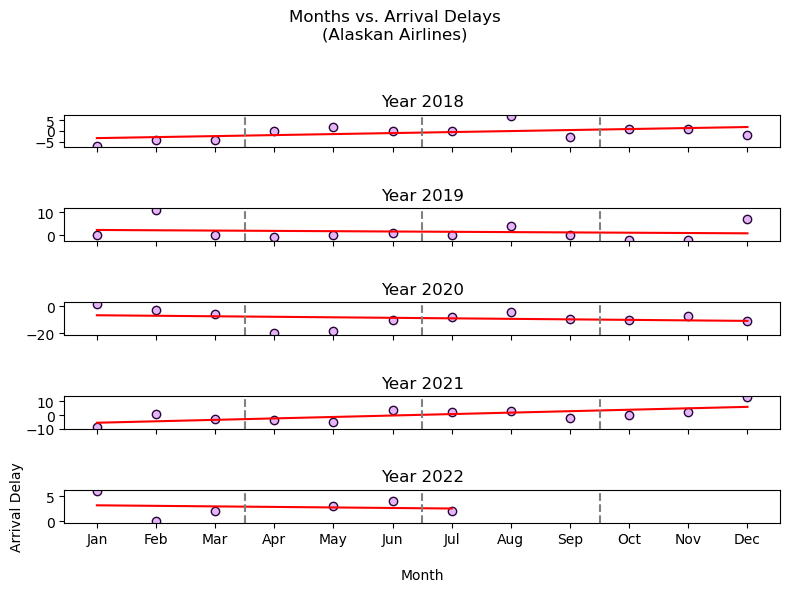

In [27]:
# Code to create the graph
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

#Creating an empty list to store the rvalues
r_values1 = []

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = alaska_df[alaska_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    r_values1.append(rvalue)
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Printing the mean rvalue
mean_rvalue2 = round(np.mean(r_values1),3)
print(f"The mean r-value is {mean_rvalue2}")
    
#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Alaskan Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Alaskan_arrival.png")

### II. Frontier Airlines

#### - Departure Delays

The mean r-value is 0.018


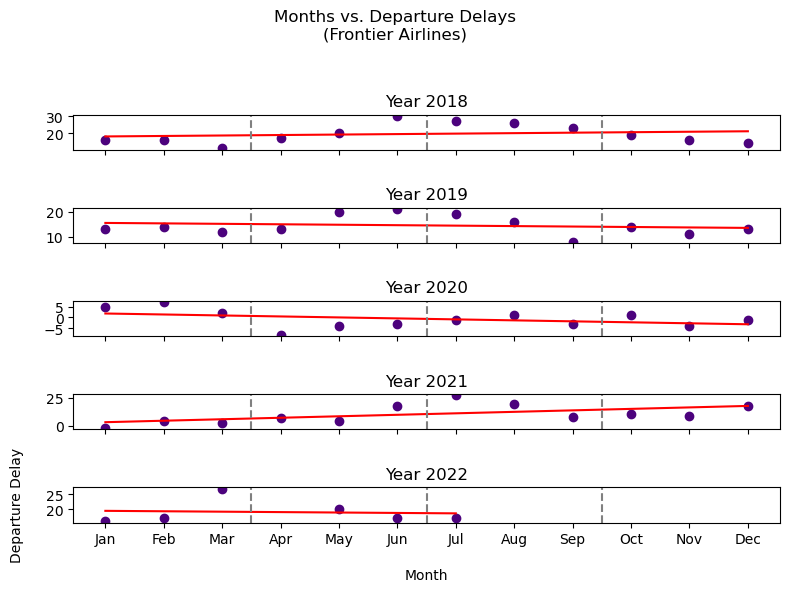

In [28]:
# Finding the unique years in the dataset
years1 = frontier_df["Year"].unique()

# Code to create the graph
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

#Creating an empty list to store the rvalues
r_values3 = []

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years1):
    #To choose the year in the DataFrame
    data = frontier_df[frontier_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    r_values3.append(rvalue)
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Printing the mean rvalue
mean_rvalue3 = round(np.mean(r_values3),3)
print(f"The mean r-value is {mean_rvalue3}")
    
#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Frontier_departure.png")

#### - Arrival Delays

The mean r-value is 0.088


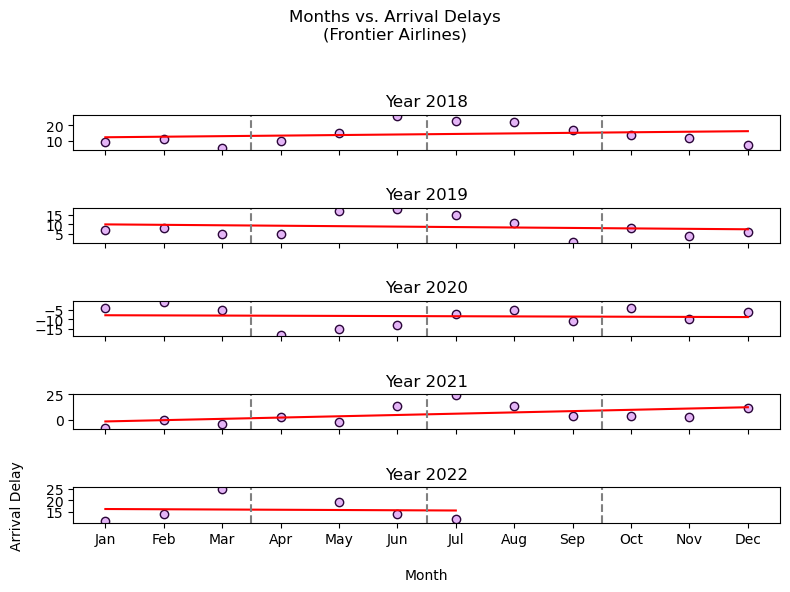

In [29]:
# Code to create the graph
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

#Creating an empty list to store the rvalues
r_values4 = []

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years1):
    #To choose the year in the DataFrame
    data = frontier_df[frontier_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    r_values4.append(rvalue)
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
#     ax.set_ylim(data['Departure Delay'].min(), data['Departure Delay'].max())
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Printing the mean rvalue
mean_rvalue4 = round(np.mean(r_values4),3)
print(f"The mean r-value is {mean_rvalue4}")
    
#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Frontier_arrival.png")

### III. Spirit Airlines

#### - Departure Delays

The mean r-value is 0.005


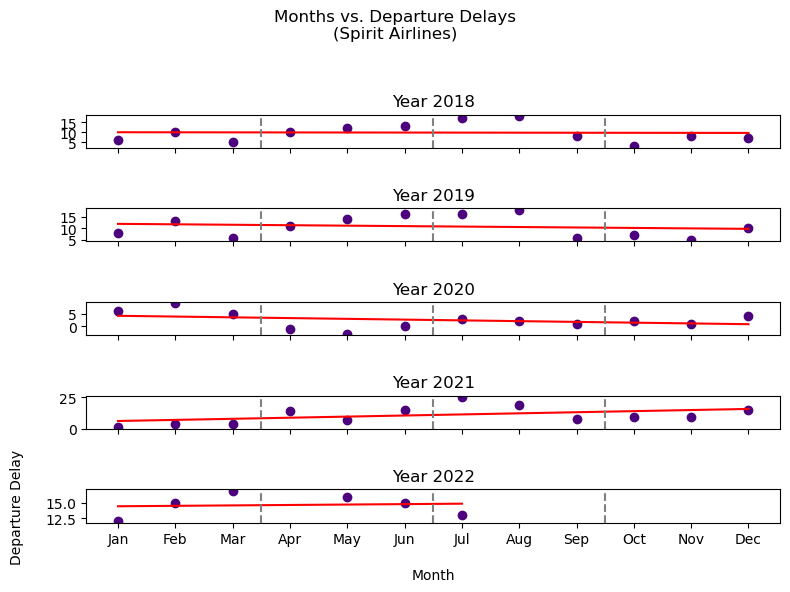

In [30]:
# Finding the unique years in the dataset
years2 = spirit_df["Year"].unique()

# Code to create the graph
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

#Creating an empty list to store the rvalues
r_values5 = []

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = spirit_df[spirit_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    r_values5.append(rvalue)
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Printing the mean rvalue
mean_rvalue5 = round(np.mean(r_values5),3)
print(f"The mean r-value is {mean_rvalue5}")
    
#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Spirit Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Spirit_departure.png")

#### - Arrival Delays

The mean r-value is -0.017


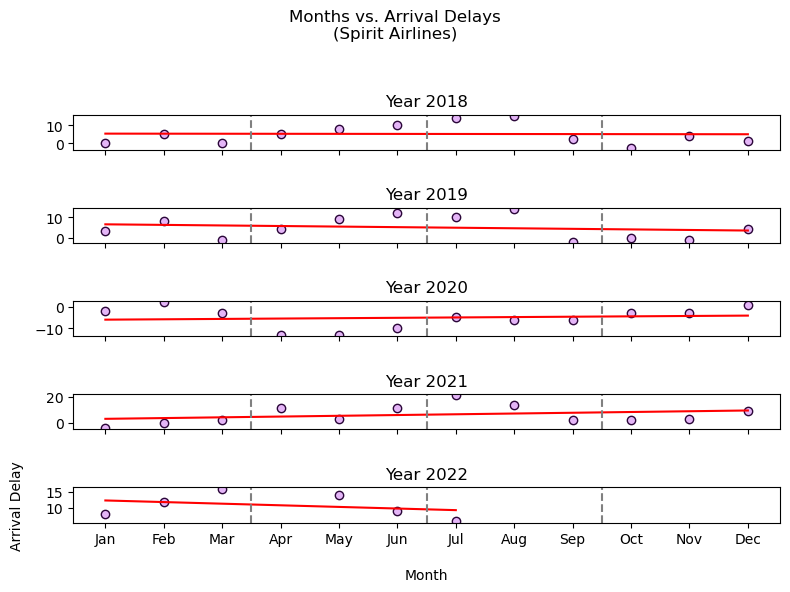

In [31]:
# Code to create the graph
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

#Creating an empty list to store the rvalues
r_values6 = []

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years2):
    #To choose the year in the DataFrame
    data = spirit_df[spirit_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    r_values6.append(rvalue)
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    #ax.set_ylim(-25, 30)
    
#     ax.set_ylim(data['Departure Delay'].min(), data['Departure Delay'].max())
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Printing the mean rvalue
mean_rvalue6 = round(np.mean(r_values6),3)
print(f"The mean r-value is {mean_rvalue6}")
    
#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Spirit Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

#Saving the graph to a seperate folder
fig.savefig("Question_3/Spirit_arrival.png")

## Summary

After analysing the data from three different airlines for their individual arrival and departure delays, we can draw the following conclusions:-

> - Weak relationship between Delays and Months of the year.
> - The graphs for most of the graphs show a positive relationship between the month and the delays. 
> - The delays are inconsistent in Q1 and Q4.
> - The number of delays increases in Q2 and gradually decreases in Q3


## Limitations

The following are the limitations for this analysis:-

> - 2019 & 2020 was marked as the years for COVID-19 flight restrictions. As a result, travel between certain countries were restricted. As such, this created an inconsistency with the data.
> - The data provided for 2022 is only available till July 2022.

In [43]:
#emily
# Reduce columns to pertinent information only
airline_data[['OP_UNIQUE_CARRIER', 'airline_name',
       'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
# df = airline_data[['OP_UNIQUE_CARRIER', 'airline_name',
#        'YEAR', 'MONTH', 'DIVERTED', 'CARRIER_DELAY',
#        'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df.dtypes

OP_UNIQUE_CARRIER       object
airline_name            object
YEAR                     int64
MONTH                    int64
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

In [60]:
# Reduce to only the three following airlines - Alaska, Frontier and Spirit
# condition1 = df['airline_name'] == ('Alaska', 'Frontier', 'Spirit')
condition1 = subset_data['airline_name'].isin(['Alaska', 'Frontier', 'Spirit'])
filtered_df = subset_data[condition1]

In [61]:
df = filtered_df
df['airline_name'].unique()
array(['Alaska', 'Frontier', 'Spirit'], dtype=object)
pd.to_datetime(df['YEAR'])
pd.to_datetime(df['MONTH'])

NameError: name 'array' is not defined

In [ ]:
# .plot(kind='bar')
df[df['CARRIER_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')
df[df['WEATHER_DELAY']!=0.0]['airline_name'].value_counts() \
.head() \
# Delays or cancellations coded "NAS" are the type of weather delays that could be reduced with corrective
# action by the airports or the Federal Aviation Administration. NAS_DELAY
df[df['NAS_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')

In [ ]:
df[df['SECURITY_DELAY']!=0.0]['airline_name'].value_counts() \
.head(10) \
# .plot(kind='bar')

In [ ]:
# Alaska
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [864283, 812777, 915213, 809775, 860993]
# Plot the values
plt.bar(x_values, y_values,)
plt.xticks(rotation = 'vertical')

In [ ]:
# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Alaska Airlines Causes for Delays')
# Display the plot
plt.show()

In [ ]:
# Spirit
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [740596, 682340, 790779, 676922, 719671]
# Plot the values
plt.bar(x_values, y_values)
plt.xticks(rotation = 'vertical')
n, bins, patches = plt.hist(x_values)
# Choose a colormap
colormap = plt.cm.get_cmap('cool')


In [ ]:
# Set gradient colors to the patches
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for patch, color in zip(patches, colormap(bin_centers)):
    patch.set_facecolor(color)
# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Spirit Airlines Causes for Delays')
# Display the plot
plt.show()

In [ ]:
# Frontier
x_values = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
y_values = [507545, 438062, 510941, 434116, 500572]
# Plot the values
plt.bar(x_values, y_values)
plt.xticks(rotation = 'vertical')
# Add labels and title
plt.xlabel('Type of Delay')
plt.ylabel('Value Count')
plt.title('Frontier Airlines Causes for Delays')
# Display the plot
plt.show()

In [25]:
#Question 4: Ismail Code
airport_1_df = subset_data[['DEST_AIRPORT_ID']].copy()
print(airport_1_df.shape)
airport_1_df.head()

(2359976, 1)


,DEST_AIRPORT_ID
0,12892
1,12892
2,14679
3,12892
4,12892


In [26]:
airport_2_df = subset_data[['ORIGIN_AIRPORT_ID', 'Description']].copy()
airport_2_df.columns = ['DEST_AIRPORT_ID', 'DEST_AIRPORT_NAME']
print(airport_2_df.shape)
airport_2_df.head()

(2359976, 2)


,DEST_AIRPORT_ID,DEST_AIRPORT_NAME
0,14057,"Portland, OR: Portland International"
1,14057,"Portland, OR: Portland International"
2,14057,"Portland, OR: Portland International"
3,14057,"Portland, OR: Portland International"
4,14057,"Portland, OR: Portland International"


In [27]:
airport_2_df = airport_2_df.drop_duplicates()
print(airport_2_df.shape)
airport_2_df.head()

(159, 2)


,DEST_AIRPORT_ID,DEST_AIRPORT_NAME
0,14057,"Portland, OR: Portland International"
74074,14747,"Seattle, WA: Seattle/Tacoma International"
356917,12339,"Indianapolis, IN: Indianapolis International"
366179,12892,"Los Angeles, CA: Los Angeles International"
466127,14908,"Santa Ana, CA: John Wayne Airport-Orange County"


In [28]:
airport_merge_df = pd.merge(airport_1_df,airport_2_df,how = 'left',on='DEST_AIRPORT_ID')
print(airport_merge_df.shape)
airport_merge_df.head()

(2359976, 2)


,DEST_AIRPORT_ID,DEST_AIRPORT_NAME
0,12892,"Los Angeles, CA: Los Angeles International"
1,12892,"Los Angeles, CA: Los Angeles International"
2,14679,"San Diego, CA: San Diego International"
3,12892,"Los Angeles, CA: Los Angeles International"
4,12892,"Los Angeles, CA: Los Angeles International"


In [29]:
subset_data['DEST_AIRPORT_NAME'] = airport_merge_df['DEST_AIRPORT_NAME']

In [30]:
subset_data['ROUTE_NAME'] = subset_data['Description'] + ' to ' + subset_data['DEST_AIRPORT_NAME']

In [31]:
subset_data.tail(100)

,ORIGIN_AIRPORT_ID,Description,Code.y,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,DEST_AIRPORT_NAME,ROUTE_NAME
2359876,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/28/22 00:00,2595,15304,-3.0,10.0,0,0,"Tampa, FL: Tampa International","Chicago, IL: Chicago Midway International to T..."
2359877,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/28/22 00:00,1355,10397,-7.0,-15.0,0,0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","Chicago, IL: Chicago Midway International to A..."
2359878,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/29/22 00:00,1355,10397,16.0,13.0,0,0,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","Chicago, IL: Chicago Midway International to A..."
2359879,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/29/22 00:00,1462,14100,-9.0,-13.0,0,0,"Philadelphia, PA: Philadelphia International","Chicago, IL: Chicago Midway International to P..."
2359880,13232,"Chicago, IL: Chicago Midway International",MDW,F9,Frontier,2022,7,7/29/22 00:00,1375,14107,-5.0,13.0,0,0,"Phoenix, AZ: Phoenix Sky Harbor International","Chicago, IL: Chicago Midway International to P..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359971,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/28/22 00:00,1941,12889,173.0,165.0,0,0,"Las Vegas, NV: McCarran International","Houston, TX: William P Hobby to Las Vegas, NV:..."
2359972,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/29/22 00:00,1338,13204,120.0,119.0,0,0,"Orlando, FL: Orlando International","Houston, TX: William P Hobby to Orlando, FL: O..."
2359973,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/29/22 00:00,1939,12889,41.0,33.0,0,0,"Las Vegas, NV: McCarran International","Houston, TX: William P Hobby to Las Vegas, NV:..."
2359974,12191,"Houston, TX: William P Hobby",HOU,F9,Frontier,2022,7,7/30/22 00:00,1338,13204,36.0,44.0,0,0,"Orlando, FL: Orlando International","Houston, TX: William P Hobby to Orlando, FL: O..."


In [32]:
subset_data[subset_data['DEST_AIRPORT_ID']==14107]['DEST_AIRPORT_NAME'].unique()

array(['Phoenix, AZ: Phoenix Sky Harbor International'], dtype=object)

In [33]:
subset_data[subset_data['DEST_AIRPORT_ID']==13204]['DEST_AIRPORT_NAME'].unique()

array(['Orlando, FL: Orlando International'], dtype=object)

In [34]:
subset_data.head()

,ORIGIN_AIRPORT_ID,Description,Code.y,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,DEST_AIRPORT_NAME,ROUTE_NAME
0,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,498,12892,-13.0,-46.0,0,0,"Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
1,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,502,12892,-12.0,-2.0,0,0,"Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
2,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,532,14679,-5.0,-8.0,0,0,"San Diego, CA: San Diego International","Portland, OR: Portland International to San Di..."
3,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,540,12892,-11.0,-23.0,0,0,"Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."
4,14057,"Portland, OR: Portland International",PDX,AS,Alaska,2018,1,1/9/18 00:00,544,12892,-6.0,12.0,0,0,"Los Angeles, CA: Los Angeles International","Portland, OR: Portland International to Los An..."


Routes with the Highest Average Delay:
                                             ROUTE_NAME  Average Delay
1707  Raleigh/Durham, NC: Raleigh-Durham Internation...     888.000000
1377  Ontario, CA: Ontario International to Burbank,...     675.000000
1593  Phoenix, AZ: Phoenix Sky Harbor International ...     400.000000
377   Cleveland, OH: Cleveland-Hopkins International...     217.000000
874   Jacksonville, FL: Jacksonville International t...     144.000000
817   Houston, TX: William P Hobby to Las Vegas, NV:...      79.702703
692   Fort Lauderdale, FL: Fort Lauderdale-Hollywood...      77.166667
378   Cleveland, OH: Cleveland-Hopkins International...      68.000000
755   Green Bay, WI: Green Bay Austin Straubel Inter...      67.666667
697   Fort Lauderdale, FL: Fort Lauderdale-Hollywood...      63.400000


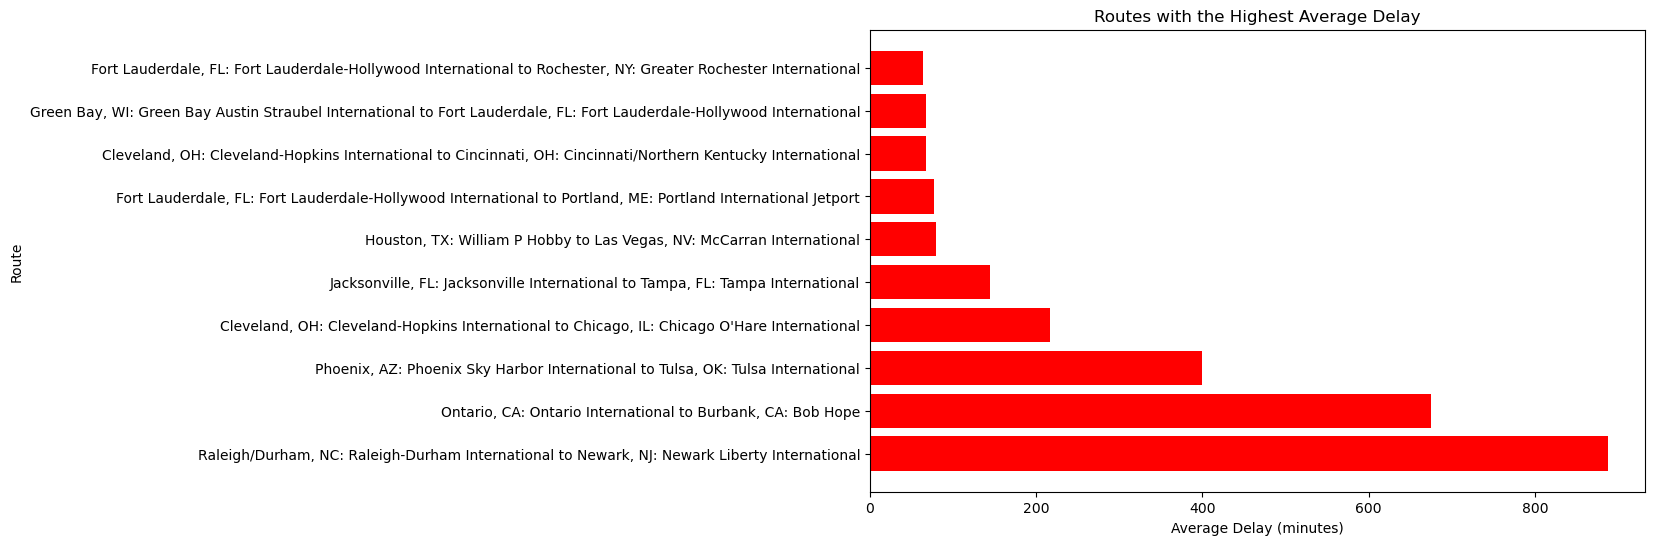

In [39]:
route_delay = subset_data.groupby('ROUTE_NAME')['DEP_DELAY'].mean().reset_index(name='Average Delay')

# Sort by average delay descending order
route_delay = route_delay.sort_values('Average Delay', ascending=False)

# routes with the highest average delay
print("Routes with the Highest Average Delay:")
print(route_delay.head(10))

# top 10 routes with the highest average delay
top_routes = route_delay.head(10)

# Create a bar plot for routes with the highest average delay
plt.figure(figsize=(10, 6))
plt.barh(top_routes['ROUTE_NAME'], top_routes['Average Delay'], color='red')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')
plt.title('Routes with the Highest Average Delay')
plt.show()


    MONTH airline_name  Average Delay
0       1       Alaska       2.873950
1       1     Frontier      10.198760
2       1       Spirit       6.939338
3       2       Alaska       3.940061
4       2     Frontier      12.154044
5       2       Spirit      10.491985
6       3       Alaska       1.742150
7       3     Frontier      11.424021
8       3       Spirit       7.937550
9       4       Alaska       0.942417
10      4     Frontier      11.248953
11      4       Spirit      10.320384
12      5       Alaska       2.380257
13      5     Frontier      14.759722
14      5       Spirit      12.056334
15      6       Alaska       4.559749
16      6     Frontier      18.812466
17      6       Spirit      14.035107
18      7       Alaska       3.783227
19      7     Frontier      19.279120
20      7       Spirit      14.912530
21      8       Alaska       5.617150
22      8     Frontier      16.911184
23      8       Spirit      15.257191
24      9       Alaska       1.018125
25      9   

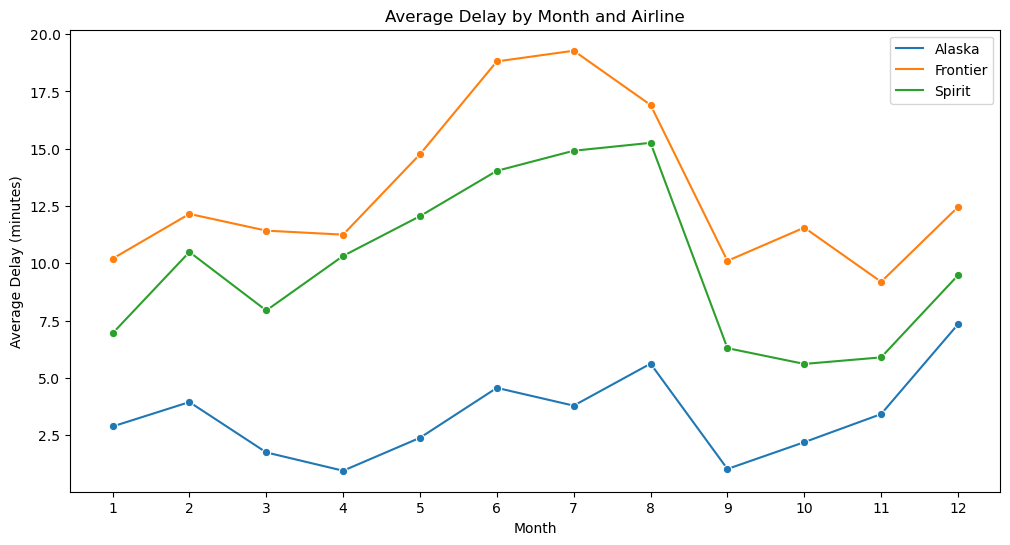

In [38]:
monthly_delay = subset_data.groupby(['MONTH', 'airline_name'])['DEP_DELAY'].mean().reset_index(name='Average Delay')
print(monthly_delay)
std_dev = monthly_delay.groupby('airline_name')['Average Delay'].std()
print("Standard Deviation:")
print(std_dev)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_delay, x='MONTH', y='Average Delay', hue='airline_name', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Month and Airline')
plt.xticks(range(1, 13))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
